## Classification of per-second seizure data

This notebook contains the implementation of different classification algorithms to classify the acceleration data gotten from sensor every second. This could technically be used every second to classify the sensed data as seizure or non seizure data and if the data seems to indicate seizure for more than 4 out of 5 seconcs we can program the m5 to detect seizure and then push the notification system.

Out of trained models, one model had an accuracy of 99.26%. We will be using that model to make the classification in m5.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
filename = 'seizure_second_data.csv'

# since the csv file does not have column headings, putting header = None to not let first row be column headings
df = pd.read_csv(filename, header = None) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.25,-1.06,0.38,-0.25,-0.92,0.31,-0.16,-0.92,0.47,-0.25,-0.90,0.31,1
1,-0.21,-0.88,0.25,-0.18,-0.81,0.43,-0.20,-0.87,0.35,-0.15,-0.62,0.53,1
2,-0.33,-1.08,0.08,-0.23,-0.90,0.21,-0.18,-1.08,0.20,-0.21,-0.88,0.40,1
3,-0.30,-0.68,0.28,-0.28,-0.29,0.73,-0.24,-0.68,0.52,-0.24,-0.84,0.32,1
4,-0.27,-0.94,0.27,-0.35,-0.77,0.56,-0.30,-0.23,0.74,-0.17,-0.95,0.51,1


In [45]:
df.shape

(2048, 13)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# creating features and label variables
x = df.drop(df.columns[-1], axis =1 )
y = df[df.columns[-1]]

In [62]:
print("The shape of x is " + str(x.shape))
print("The shape of y is " + str(y.shape))

The shape of x is (2048, 12)
The shape of y is (2048,)


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

model = svm.SVC(kernel = 'linear', C = 5)

In [64]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
print("The accuracy of the classifier is " + str(accuracy_score(y_pred, y_test)*100))

The accuracy of the classifier is 98.78048780487805


In [66]:
confusion_matrix(y_test, y_pred)

array([[221,   2],
       [  3, 184]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


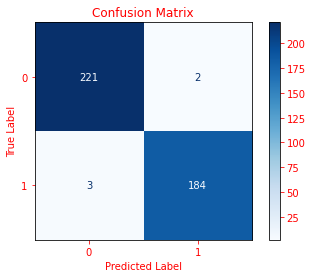

In [67]:
color = 'red'
mat = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
mat.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [56]:
svm_model2 = svm.SVC(kernel = 'linear', C = 100)

In [57]:
svm_model2.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [58]:
print("The accuracy of svm_model2 is " + str(accuracy_score(y_pred, y_test)*100))

The accuracy of model2 is 98.78048780487805


Using cross fold validation to find the best parameter for the model

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['linear','rbf','poly']}
svc=svm.SVC(probability=True)
best_Svm_model=GridSearchCV(svc,param_grid)

best_Svm_model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [73]:
best_Svm_model.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [75]:
y_pred = best_Svm_model.predict(x_test)
print("The accuracy of best_Svm_model is " + str(accuracy_score(y_pred, y_test)*100))

The accuracy of model3 is 99.26829268292683


Confusion matrix for the final model: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


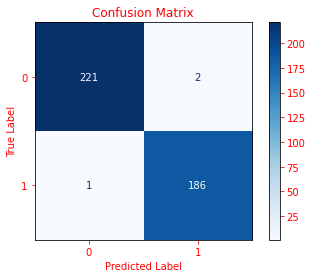

In [76]:
print("Confusion matrix for the final model: ")
color = 'red'
mat = plot_confusion_matrix(best_Svm_model, x_test, y_test, cmap=plt.cm.Blues)
mat.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators' : [10, 100, 200]}

random_forest_classifier = RandomForestClassifier()
random_forest_model = GridSearchCV(random_forest_classifier, param_grid)
random_forest_model.fit(x_train, y_train)
random_forest_model.best_params_

{'n_estimators': 10}

In [85]:
y_pred = random_forest_model.predict(x_test)
print("The accuracy of random_forest_model is " + str(accuracy_score(y_pred, y_test)*100))

The accuracy of random_forest_model is 99.02439024390245


Confusion matrix for the final model: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


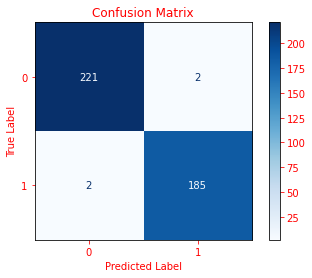

In [86]:
print("Confusion matrix for the final model: ")
color = 'red'
mat = plot_confusion_matrix(random_forest_model, x_test, y_test, cmap=plt.cm.Blues)
mat.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

So based on the observation the SVM model trained using the Grid Search CV seems to be the most accurate with parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. So downloading that model to be used in the m5stack to make the detection.

In [91]:
from google.colab import files
import pickle

filename = 'svm_classification_model.sav'
pickle.dump(model, open(filename, 'wb'))

files.download('svm_classification_model.sav')
print("Model saved")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved
